### 【問題1】不純度を求める関数

In [35]:
import numpy as np

#サンプルデータの作成(diver記載のサンプルデータ)
Class1_X = np.arange(0,15).reshape(-1,1)
Class2_X = np.arange(100,115).reshape(-1,1)
Class3_X = np.arange(1000,1015).reshape(-1,1)
Class1_y = np.full(15, 1).reshape(-1,1)
Class2_y = np.full(15, 2).reshape(-1,1)
Class3_y = np.full(15, 3).reshape(-1,1)
X = np.vstack((Class1_X, Class2_X, Class3_X))
y = np.vstack((Class1_y, Class2_y, Class3_y))

#サンプルの総数
Nt_all = X.shape[0]

#クラスの数
K = len(np.unique(y))

#i番目のクラス
Ci = np.unique(y)       

#i番目のクラスに属するサンプル数の取得
Nt_i = np.zeros(K)
for i in range(K):
    Nt_i[i] = np.count_nonzero(y == Ci[i])

#ジニ不純度の計算
sigma = 0
for i in range(K):
    sigma +=  (Nt_i[i]/Nt_all) ** 2
Gini_impurity = 1 - sigma
print("ジニ不純度:", Gini_impurity)

ジニ不純度: 0.6666666666666667


### 【問題2】情報利得を求める関数

In [47]:
def calc_Gini_impurity(X, y):
    
    #サンプルの総数
    Nt_all = X.shape[0]

    #クラスの数
    K = len(np.unique(y))

    #i番目のクラス
    Ci = np.unique(y)       

    #i番目のクラスに属するサンプル数の取得
    Nt_i = np.zeros(K)
    
    #ノードのi番目にクラスに属するサンプル数
    for i in range(K):
        Nt_i[i] = np.count_nonzero(y == Ci[i])

    #ジニ不純度の計算
    sigma = 0
    for i in range(K):
        sigma +=  (Nt_i[i]/Nt_all) ** 2
    Gini_impurity = 1 - sigma

    return Gini_impurity

#サンプル数を入手する関数
def get_sample_num(X):
    sample_num = X.shape[0]
    return sample_num


#左ノードのサンプルデータの作成（diverの例題と同じサンプルデータ）
left_Class1_X = np.arange(0,10).reshape(-1,1)
left_Class2_X = np.arange(100,130).reshape(-1,1)
left_Class1_y = np.full(10, 1).reshape(-1,1)
left_Class2_y = np.full(30, 2).reshape(-1,1)
left_X   = np.vstack((left_Class1_X, left_Class2_X))
left_y = np.vstack((left_Class1_y, left_Class2_y))

#右ノードのサンプルデータの作成（diverの例題と同じサンプルデータ）
right_Class1_X = np.arange(0,20).reshape(-1,1)
right_Class2_X = np.arange(100,105).reshape(-1,1)
right_Class1_y = np.full(20, 1).reshape(-1,1)
right_Class2_y = np.full(5, 2).reshape(-1,1)
right_X = np.vstack((right_Class1_X, right_Class2_X))
right_y = np.vstack((right_Class1_y, right_Class2_y))

#親ノードのサンプルデータの作成
parent_node_X = np.vstack((left_X, right_X))
parent_node_y = np.vstack((left_y, right_y))

#情報利得の計算
I_p = calc_Gini_impurity(parent_node_X, parent_node_y)
I_left = calc_Gini_impurity(left_X, left_y)
I_right = calc_Gini_impurity(right_X, right_y)

N_p_all =get_sample_num(parent_node_X)
N_left_all = get_sample_num(left_X)
N_right_all = get_sample_num(right_X)

IG_p = I_p - (N_left_all/N_p_all)*I_left - (N_right_all/N_p_all)*I_right

print("情報利得", IG_p)

情報利得 0.14319526627218937


### 【問題3】学習

In [141]:
#ジニ不純度を計算する関数
def calc_Gini_impurity(X, y):
    
    #サンプルの総数
    Nt_all = X.shape[0]

    #クラスの数
    K = len(np.unique(y))

    #i番目のクラス
    Ci = np.unique(y)       

    #i番目のクラスに属するサンプル数の取得
    Nt_i = np.zeros(K)
    
    #ノードのi番目にクラスに属するサンプル数
    for i in range(K):
        Nt_i[i] = np.count_nonzero(y == Ci[i])

    #ジニ不純度の計算
    sigma = 0
    for i in range(K):
        sigma +=  (Nt_i[i]/Nt_all) ** 2
    Gini_impurity = 1 - sigma

    return Gini_impurity

#サンプル数を入手する関数
def get_sample_num(X):
    sample_num = X.shape[0]
    return sample_num

#情報利得を計算する関数
def information_profit(X, y, left_X, left_y, right_X, right_y):
    I_p = calc_Gini_impurity(parent_node_X, parent_node_y)
    I_left = calc_Gini_impurity(left_X, left_y)
    I_right = calc_Gini_impurity(right_X, right_y)

    N_p_all =get_sample_num(parent_node_X)
    N_left_all = get_sample_num(left_X)
    N_right_all = get_sample_num(right_X)

    IG_p = I_p - (N_left_all/N_p_all)*I_left - (N_right_all/N_p_all)*I_right

    return IG_p

#シンプルデータセット２の生成
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#print(X.shape) #→(40, 2)
#print(y.shape)　#→(40,)
y = y.reshape(-1,1)

#train, testデータへの分割
X_train, X_test, y_train, y_test = train_test_split(X,y)
Xy = np.hstack((X_train, y_train))

#x軸について昇順でソート
Xy_sorted = Xy[Xy[:,0].argsort(), :]

#サンプルデータの分割、分割データ毎に情報利得の計算
n_samples = X_train.shape[0]
n_features = X_train.shape[1]

IG_p_list ={}
for i in range(n_samples):
    #Xの値を昇順にソート。（不要かもしれないが、検討中のコードを残している。）
    split_feature = Xy_sorted[i,:]
    left_Xy, right_Xy = np.split(Xy_sorted, [i])
    
    parent_X = Xy_sorted[:,:n_features]
    parent_y = Xy_sorted[:,n_features:]
    left_X = left_Xy[:,:n_features]
    left_y = left_Xy[:,n_features:]
    right_X = right_Xy[:,:n_features]
    right_y = right_Xy[:,n_features:]

    #情報利得の計算
    IG_p = information_profit(parent_X, parent_y, left_X, left_y, right_X, right_y)
    IG_p_list[i] = IG_p
    
#情報利得の最大値を求める。  
max_IG_p = max(IG_p_list.values())

print("分割に用いた特徴量: {}".format(Xy_sorted[i, :]), "の0列目(x軸に垂直な線で分割)")
print("分割した情報利得: {}".format(max_IG_p))


分割に用いた特徴量: [1.4771 3.4896 0.    ] の0列目(x軸に垂直な線で分割)
分割した情報利得: 0.29374471682163983


### 【問題4】推定

In [180]:
class ScratchDecesionTreeClassifierDepth1():

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.split_lavel = 0
        self.split_feature = 0
        self.split_column_num = 0
        
    def fit(self, X, y):
        #x軸に対して１回分割した場合の情報利得の確認
        split_column_num = 0
        IG_p_0, split_featute_0, left_X_0, left_y_0, right_X_0, right_y_0 = split_x(X, y, split_column_num)
        #y軸に対して１回分割した場合の情報利得の確認
        split_column_num = 1
        IG_p_1, split_featute_1, left_X_1, left_y_1, right_X_1, right_y_1 = split_x(X, y, split_column_num)

        #x軸、y軸で分割して情報利得が大きい方で分割する。
        if IG_p_0 > IG_p_1:
            self.split_feature = split_featute_0
            self.split_column_num = 0 #x軸で分割を採用
            num_0 = np.count_nonzero(right_y_0 == 0)
            num_1 = np.count_nonzero(right_y_0 == 1)    
            if num_0 > num_1:
                self.split_lavel = 0 #self.split_lavelには、predictしたいXが、self.split_featureを超えた場合のラベルを格納する。
            else:
                self.split_lavel = 1
        else:
            self.split_feature = split_featute_1
            self.split_column_num = 1 #y軸で分割を採用
            num_0 = np.count_nonzero(right_y_1 == 0)
            num_1 = np.count_nonzero(right_y_1 == 1)    
            if num_0 > num_1:
                self.split_lavel = 0 #self.split_lavelには、predictしたいXが、self.split_featureを超えた場合のラベルを格納する。
            else:
                self.split_lavel = 1
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        
        #サンプル数、特徴量の数を保存
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        #fitで分割した境界値を超えるor超えないを確認。（超えた場合のラベルはfitにて設定している）
        y_pred =  list(range(n_samples))
        for i in range(n_samples):
            if X[i, self.split_column_num] >= self.split_feature[self.split_column_num]:
                y_pred[i] = self.split_lavel
            else:
                y_pred[i] =  abs(self.split_lavel - 1)
                
        return y_pred


#ジニ不純度を計算する関数
def calc_Gini_impurity(X, y):
    
    #サンプルの総数
    Nt_all = X.shape[0]

    #クラスの数
    K = len(np.unique(y))

    #i番目のクラス
    Ci = np.unique(y)       

    #i番目のクラスに属するサンプル数の取得
    Nt_i = np.zeros(K)
    
    #ノードのi番目にクラスに属するサンプル数
    for i in range(K):
        Nt_i[i] = np.count_nonzero(y == Ci[i])

    #ジニ不純度の計算
    sigma = 0
    for i in range(K):
        sigma +=  (Nt_i[i]/Nt_all) ** 2
    Gini_impurity = 1 - sigma

    return Gini_impurity

#サンプル数を入手する関数
def get_sample_num(X):
    sample_num = X.shape[0]
    return sample_num

#情報利得を計算する関数
def information_profit(X, y, left_X, left_y, right_X, right_y):
    I_p = calc_Gini_impurity(parent_node_X, parent_node_y)
    I_left = calc_Gini_impurity(left_X, left_y)
    I_right = calc_Gini_impurity(right_X, right_y)

    N_p_all =get_sample_num(parent_node_X)
    N_left_all = get_sample_num(left_X)
    N_right_all = get_sample_num(right_X)

    IG_p = I_p - (N_left_all/N_p_all)*I_left - (N_right_all/N_p_all)*I_right

    return IG_p

#x軸にて分割する関数
def split_x(X, y, split_column_num):
    #X,yの結合。（xでソートした際に対応するyもソートしたいため）
    Xy = np.hstack((X, y))    

    #x軸について昇順でソート。
    #split_column_numが0でx軸のデータを分割。numが1でy軸のデータを分割
    Xy_sorted = Xy[Xy[:,split_column_num].argsort(), :]

    #サンプル数、特徴量の数を保存
    n_samples = X.shape[0]
    n_features = X.shape[1]

    #データの分割、分割データ毎に情報利得の計算を行う。
    max_IG_p = 0
    for i in range(n_samples):
        split_feature = Xy_sorted[i,:]
        left_Xy, right_Xy = np.split(Xy_sorted, [i])

        parent_X = Xy_sorted[:,:n_features]
        parent_y = Xy_sorted[:,n_features:]
        left_X = left_Xy[:,:n_features]
        left_y = left_Xy[:,n_features:]
        right_X = right_Xy[:,:n_features]
        right_y = right_Xy[:,n_features:]

        IG_p = information_profit(parent_X, parent_y, left_X, left_y, right_X, right_y)
        if IG_p > max_IG_p:
            max_IG_p = IG_p
            max_IG_p_sorted_index = i
            max_IG_p_feature = split_feature

    #分割後のサンプルデータを求める。
    left_Xy, right_Xy = np.split(Xy_sorted, [max_IG_p_sorted_index])
    next_left_X = left_Xy[:,:n_features]
    next_left_y = left_Xy[:,n_features:]
    next_right_X = right_Xy[:,:n_features]
    next_right_y = right_Xy[:,n_features:]
    
    return max_IG_p, max_IG_p_feature, next_left_X, next_left_y, next_right_X, next_right_y

#シンプルデータセット２の生成
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#print(X.shape) #→(40, 2)
#print(y.shape)　#→(40,)
y = y.reshape(-1,1)

#train, testデータへの分割
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#機械学習(fit)
tree = ScratchDecesionTreeClassifierDepth1()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


###   【問題5】学習と推定

In [174]:
#scikitインポート
import_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
import_tree.fit(X_train, y_train)
import_y_pred = import_tree.predict(X_test)

print("スクラッチの推定値\n", y_pred)
print("scikit learnの推定値\n", import_y_pred)
print("テストデータの値\n", y_test.flatten().tolist())

スクラッチの推定値
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
scikit learnの推定値
 [1 0 0 0 0 0 0 0 1 1]
テストデータの値
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]


→スクラッチでの推定値とscikit learn(深さ:1)の推定値は同値となったため、スクラッチ実装は正しく動作していると考える。

### 【問題6】決定領域の可視化

判定境界線の数値: 5.3524
判定境界線の軸方向： 1


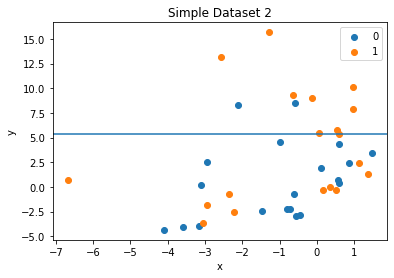

In [204]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

print("判定境界線の数値:", tree.split_feature[tree.split_column_num])
print("判定境界線の軸方向：", tree.split_column_num)

#決定木の判定領域を表す線を描画
if tree.split_column_num == 0:
    plt.axvline(x=tree.split_feature[tree.split_column_num], ymin=-6, ymax=20)
elif tree.split_column_num == 1:
    plt.axhline(y=tree.split_feature[tree.split_column_num], xmin=-8, xmax=2)

plt.scatter(X[:20,0], X[:20,1], label='0')
plt.scatter(X[21:,0], X[21:,1], label='1')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Dataset 2")
plt.legend()
plt.show()


↑今回のサンプルデータでは、判定境界線より上にtestデータの特徴量が位置する場合ラベル０となる。

　決定木は深さ１の場合ではかなり大凡の予測しかできないことがわかる。

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier

#ジニ不純度を計算する関数
def calc_Gini_impurity(X, y):
    
    #サンプルの総数
    Nt_all = X.shape[0]

    #クラスの数
    K = len(np.unique(y))

    #i番目のクラス
    Ci = np.unique(y)       

    #i番目のクラスに属するサンプル数の取得
    Nt_i = np.zeros(K)
    
    #ノードのi番目にクラスに属するサンプル数
    for i in range(K):
        Nt_i[i] = np.count_nonzero(y == Ci[i])

    #ジニ不純度の計算
    sigma = 0
    for i in range(K):
        sigma +=  (Nt_i[i]/Nt_all) ** 2
    Gini_impurity = 1 - sigma

    return Gini_impurity

#サンプル数を入手する関数
def get_sample_num(X):
    sample_num = X.shape[0]
    return sample_num

#情報利得を計算する関数
def information_profit(parent_node_X, parent_node_y, left_X, left_y, right_X, right_y):
    I_p = calc_Gini_impurity(parent_node_X, parent_node_y)
    I_left = calc_Gini_impurity(left_X, left_y)
    I_right = calc_Gini_impurity(right_X, right_y)

    N_p_all =get_sample_num(parent_node_X)
    N_left_all = get_sample_num(left_X)
    N_right_all = get_sample_num(right_X)

    IG_p = I_p - (N_left_all/N_p_all)*I_left - (N_right_all/N_p_all)*I_right

    return IG_p

class DecisionTreeNode(object):
    def __init__(self, X, y, max_depth):
        self.left = None  #左側の小ノードのインスタンスを格納する。
        self.right = None#右側の〜
        self.max_depth = max_depth #分割を停止するための最大深さを格納する。
        self.depth = None #このノードの深さを格納
        self.X = X #  Xを格納
        self.y = y# yを格納
        self.threshold = None
        self.feature = None #分割する特徴量の軸を保管（特徴量の種類）
        self.IG_max = None #分割後の情報利得を保管。０の場合、これ以上の分割を辞める。
        self.label = None #最頻値を求める→このノードのラベルになる。

    def split(self, depth): 
        self.depth = depth

        #特徴量データのサイズ確認
        n_samples = self.X.shape[0]
        n_features = self.X.shape[1]

        #情報利得が最大となる境界線の引き方（特徴量の種類(j), 特徴量(i)を求める。
        self.IG_max = 0
        for j in range(n_features):
            for i in self.X[:, j]:
                left_X = self.X[self.X[:,j] >= i]
                left_y = self.y[self.X[:,j] >= i]
                right_X = self.X[self.X[:,j] < i]
                right_y = self.y[self.X[:,j] < i]
                IG = information_profit(self.X, self.y, left_X, left_y, right_X, right_y)
                if self.IG_max < IG:
                    self.IG_max = IG
                    self.threshold = i
                    self.feature = j

        #ノードのラベルを確定（yの最頻値がラベルとなる）
        self.label, _ = stats.mode(self.y)
        self.label = self.label[0,0]

        #Labelは分割前のノードにおいて、どのラベルが一番多いかを表している。
        print('Depth: {}, Feature: {},Threshold: {}, Label: {}, IG:{}'.format(self.depth, self.feature, self.threshold, self.label, self.IG_max))
       
        #深さが最大深さに達していたか、もしくはジニ不純度が０になったら処理を終了する。
        if self.depth == self.max_depth or self.IG_max == 0:
            return
        
        #この書き方はnp.splitが不要なので、すごく便利と思う。thresholdを超える要素はTrue, 超えない要素にはFalseが入る。
        idx_left = self.X[:, self.feature] >= self.threshold
        idx_right = self.X[:, self.feature] < self.threshold
        #print(idx_left) →　True, Falseが入る。

        #親ノードの下に左ノード、右ノードの作成。self.data[idx_left]という使い方でデータを分割できる。
        self.left = DecisionTreeNode(self.X[idx_left],  self.y[idx_left], self.max_depth)
        self.right = DecisionTreeNode(self.X[idx_right], self.y[idx_right], self.max_depth)
        
        #作成した左ノード、右ノードに対して深さ＋１として分割
        self.left.split(self.depth +1)
        self.right.split(self.depth +1)
        
    def predict(self, X, node=tree):
        
        #特徴量データのサイズ確認
        n_samples = X.shape[0]
        
        #ラベルリストの作成
        pred_label_list = np.zeros((n_samples,1))
        #print(pred_label_list.shape)
        #print(n_samples)
        
        for i in range(n_samples):
            pred_label_list[i] = self.predict_split(X[i, :])
            
        return pred_label_list
            
    def predict_split(self, X):

        #print("X[self.feature]", X[self.feature])
        #print("self.depth:", self.depth)
        #print("self.threshold", self.threshold)
        
        if self.feature == None or self.depth == self.max_depth:
            return self.label
        elif X[self.feature] >= self.threshold:
            return self.left.predict_split(X)
        elif X[self.feature] < self.threshold:
            return self.right.predict_split(X)
                

            
#シンプルデータセット２の生成
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y = y.reshape(-1,1)

#train, testデータへの分割
X_train, X_test, y_train, y_test = train_test_split(X,y)

#機械学習
tree = DecisionTreeNode(X_train, y_train, max_depth=2)
tree.split(depth=0)

y_pred = tree.predict(X_test)

#scikitインポート
import_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
import_tree.fit(X_train, y_train)
import_y_pred = import_tree.predict(X_test)

print("スクラッチの推定値\n", y_pred.flatten())
print("scikit learnの推定値\n", import_y_pred)
print("テストデータの値\n", y_test.flatten().tolist())


Depth: 0, Feature: 1,Threshold: -1.3927, Label: 0, IG:0.08489898989898993
Depth: 1, Feature: 1,Threshold: 10.083, Label: 1, IG:0.052849064810787105
Depth: 2, Feature: None,Threshold: None, Label: 1, IG:0
Depth: 2, Feature: 1,Threshold: 0.37158, Label: 1, IG:0.08700902052702622
Depth: 1, Feature: 0,Threshold: -1.4621, Label: 0, IG:0.05208333333333334
Depth: 2, Feature: None,Threshold: None, Label: 0, IG:0
Depth: 2, Feature: 0,Threshold: -2.234, Label: 0, IG:0.4444444444444444
スクラッチの推定値
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
scikit learnの推定値
 [1 1 1 1 1 1 1 0 0 0]
テストデータの値
 [1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
